In [22]:
# Importint the necessary librabries that will be used for analyzing data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Loading financial data for analysis
path = "data/Company Financials/Financials.csv"
financial_data = pd.read_csv(path)

# CLEANING DATA

In [24]:
# Checking fo possibe null values
financial_data.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

In [25]:
# Checking for number of rows and columns respectively
financial_data.shape

(700, 16)

In [26]:
#checking for metadata details
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [27]:
# Overview of sample data 
financial_data.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
5,Government,Germany,Carretera,None,"$1,513.00",$3.00,$350.00,"$5,29,550.00",$-,"$5,29,550.00","$3,93,380.00","$1,36,170.00",01/12/2014,12,December,2014
6,Midmarket,Germany,Montana,None,$921.00,$5.00,$15.00,"$13,815.00",$-,"$13,815.00","$9,210.00","$4,605.00",01/03/2014,3,March,2014
7,Channel Partners,Canada,Montana,None,"$2,518.00",$5.00,$12.00,"$30,216.00",$-,"$30,216.00","$7,554.00","$22,662.00",01/06/2014,6,June,2014
8,Government,France,Montana,None,"$1,899.00",$5.00,$20.00,"$37,980.00",$-,"$37,980.00","$18,990.00","$18,990.00",01/06/2014,6,June,2014
9,Channel Partners,Germany,Montana,None,"$1,545.00",$5.00,$12.00,"$18,540.00",$-,"$18,540.00","$4,635.00","$13,905.00",01/06/2014,6,June,2014


In [28]:
# The code removes space between names of the column
financial_data.columns = financial_data.columns.str.replace(' ', '')

In [29]:
# #=reviewing data
financial_data.head(10)

,Segment,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
5,Government,Germany,Carretera,None,"$1,513.00",$3.00,$350.00,"$5,29,550.00",$-,"$5,29,550.00","$3,93,380.00","$1,36,170.00",01/12/2014,12,December,2014
6,Midmarket,Germany,Montana,None,$921.00,$5.00,$15.00,"$13,815.00",$-,"$13,815.00","$9,210.00","$4,605.00",01/03/2014,3,March,2014
7,Channel Partners,Canada,Montana,None,"$2,518.00",$5.00,$12.00,"$30,216.00",$-,"$30,216.00","$7,554.00","$22,662.00",01/06/2014,6,June,2014
8,Government,France,Montana,None,"$1,899.00",$5.00,$20.00,"$37,980.00",$-,"$37,980.00","$18,990.00","$18,990.00",01/06/2014,6,June,2014
9,Channel Partners,Germany,Montana,None,"$1,545.00",$5.00,$12.00,"$18,540.00",$-,"$18,540.00","$4,635.00","$13,905.00",01/06/2014,6,June,2014


In [30]:
# function to remove dollar Sign 
financial_data['UnitsSold'] = financial_data['UnitsSold'].str.replace('$', '')
financial_data['ManufacturingPrice'] = financial_data['ManufacturingPrice'].str.replace('$', '')
financial_data['SalePrice'] = financial_data['SalePrice'].str.replace('$', '')
financial_data['Sales'] = financial_data['Sales'].str.replace('$', '')
financial_data['COGS'] = financial_data['COGS'].str.replace('$', '')
financial_data['Profit'] = financial_data['Profit'].str.replace('$', '')
financial_data['Sales'] = financial_data['Sales'].str.replace('$', '')
financial_data['GrossSales'] = financial_data['GrossSales'].str.replace('$', '')



# function to remove comma Sign and convert data to numerical(float)
financial_data['UnitsSold'] = financial_data['UnitsSold'].str.replace(',', '')
financial_data['ManufacturingPrice'] = financial_data['ManufacturingPrice'].str.replace('$', '')
financial_data['SalePrice'] = financial_data['SalePrice'].str.replace(',', '')
financial_data['Sales'] = financial_data['Sales'].str.replace(',', '')
financial_data['COGS'] = financial_data['COGS'].str.replace(',', '')
financial_data['Profit'] = financial_data['Profit'].str.replace(',', '')
financial_data['Sales'] = financial_data['Sales'].str.replace(',', '')
financial_data['GrossSales'] = financial_data['GrossSales'].str.replace(',', '')




# Stripping the spaces 
financial_data['UnitsSold'] = financial_data['UnitsSold'].str.strip()
financial_data['ManufacturingPrice'] = financial_data['ManufacturingPrice'].str.strip()
financial_data['SalePrice'] = financial_data['SalePrice'].str.strip()
financial_data['Sales'] = financial_data['Sales'].str.strip()
financial_data['COGS'] = financial_data['COGS'].str.strip()
financial_data['Profit'] = financial_data['Profit'].str.strip()
financial_data['Sales'] = financial_data['Sales'].str.strip()
financial_data['GrossSales'] = financial_data['GrossSales'].str.strip()


/tmp/ipykernel_6343/3111435376.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  financial_data['UnitsSold'] = financial_data['UnitsSold'].str.replace('$', '')
/tmp/ipykernel_6343/3111435376.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  financial_data['ManufacturingPrice'] = financial_data['ManufacturingPrice'].str.replace('$', '')
/tmp/ipykernel_6343/3111435376.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  financial_data['SalePrice'] = financial_data['SalePrice'].str.replace('$', '')
/tmp/ipykernel_6343/31

In [31]:
# Proof checking Top data
financial_data.head(10)

,Segment,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,$-,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,$-,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,$-,32670.00,21780.00,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,13320.00,$-,13320.00,8880.00,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.00,3.00,15.00,37050.00,$-,37050.00,24700.00,12350.00,01/06/2014,6,June,2014
5,Government,Germany,Carretera,None,1513.00,3.00,350.00,529550.00,$-,529550.00,393380.00,136170.00,01/12/2014,12,December,2014
6,Midmarket,Germany,Montana,None,921.00,5.00,15.00,13815.00,$-,13815.00,9210.00,4605.00,01/03/2014,3,March,2014
7,Channel Partners,Canada,Montana,None,2518.00,5.00,12.00,30216.00,$-,30216.00,7554.00,22662.00,01/06/2014,6,June,2014
8,Government,France,Montana,None,1899.00,5.00,20.00,37980.00,$-,37980.00,18990.00,18990.00,01/06/2014,6,June,2014
9,Channel Partners,Germany,Montana,None,1545.00,5.00,12.00,18540.00,$-,18540.00,4635.00,13905.00,01/06/2014,6,June,2014


In [32]:
# Conevrting columns types to numerical (float) data type

financial_data['UnitsSold'] = pd.to_numeric(financial_data['UnitsSold'])
financial_data['ManufacturingPrice'] = pd.to_numeric(financial_data['ManufacturingPrice'])
financial_data['SalePrice'] = pd.to_numeric(financial_data['SalePrice'])
financial_data['Sales'] = pd.to_numeric(financial_data['Sales'])
financial_data['COGS'] = pd.to_numeric(financial_data['COGS'])
financial_data['Profit'] = pd.to_numeric(financial_data['Profit'], errors='coerce')
financial_data['Sales'] = pd.to_numeric(financial_data['Sales'])
financial_data['GrossSales'] = pd.to_numeric(financial_data['GrossSales'])

In [33]:
# Relacing the null values with zero
financial_data['Profit'].fillna(0, inplace=True)

In [34]:
# proof checking the meta data 
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Segment             700 non-null    object 
 1   Country             700 non-null    object 
 2   Product             700 non-null    object 
 3   DiscountBand        700 non-null    object 
 4   UnitsSold           700 non-null    float64
 5   ManufacturingPrice  700 non-null    float64
 6   SalePrice           700 non-null    float64
 7   GrossSales          700 non-null    float64
 8   Discounts           700 non-null    object 
 9   Sales               700 non-null    float64
 10  COGS                700 non-null    float64
 11  Profit              700 non-null    float64
 12  Date                700 non-null    object 
 13  MonthNumber         700 non-null    int64  
 14  MonthName           700 non-null    object 
 15  Year                700 non-null    int64  
dtypes: float

# DATA PLOTS

# Histogram

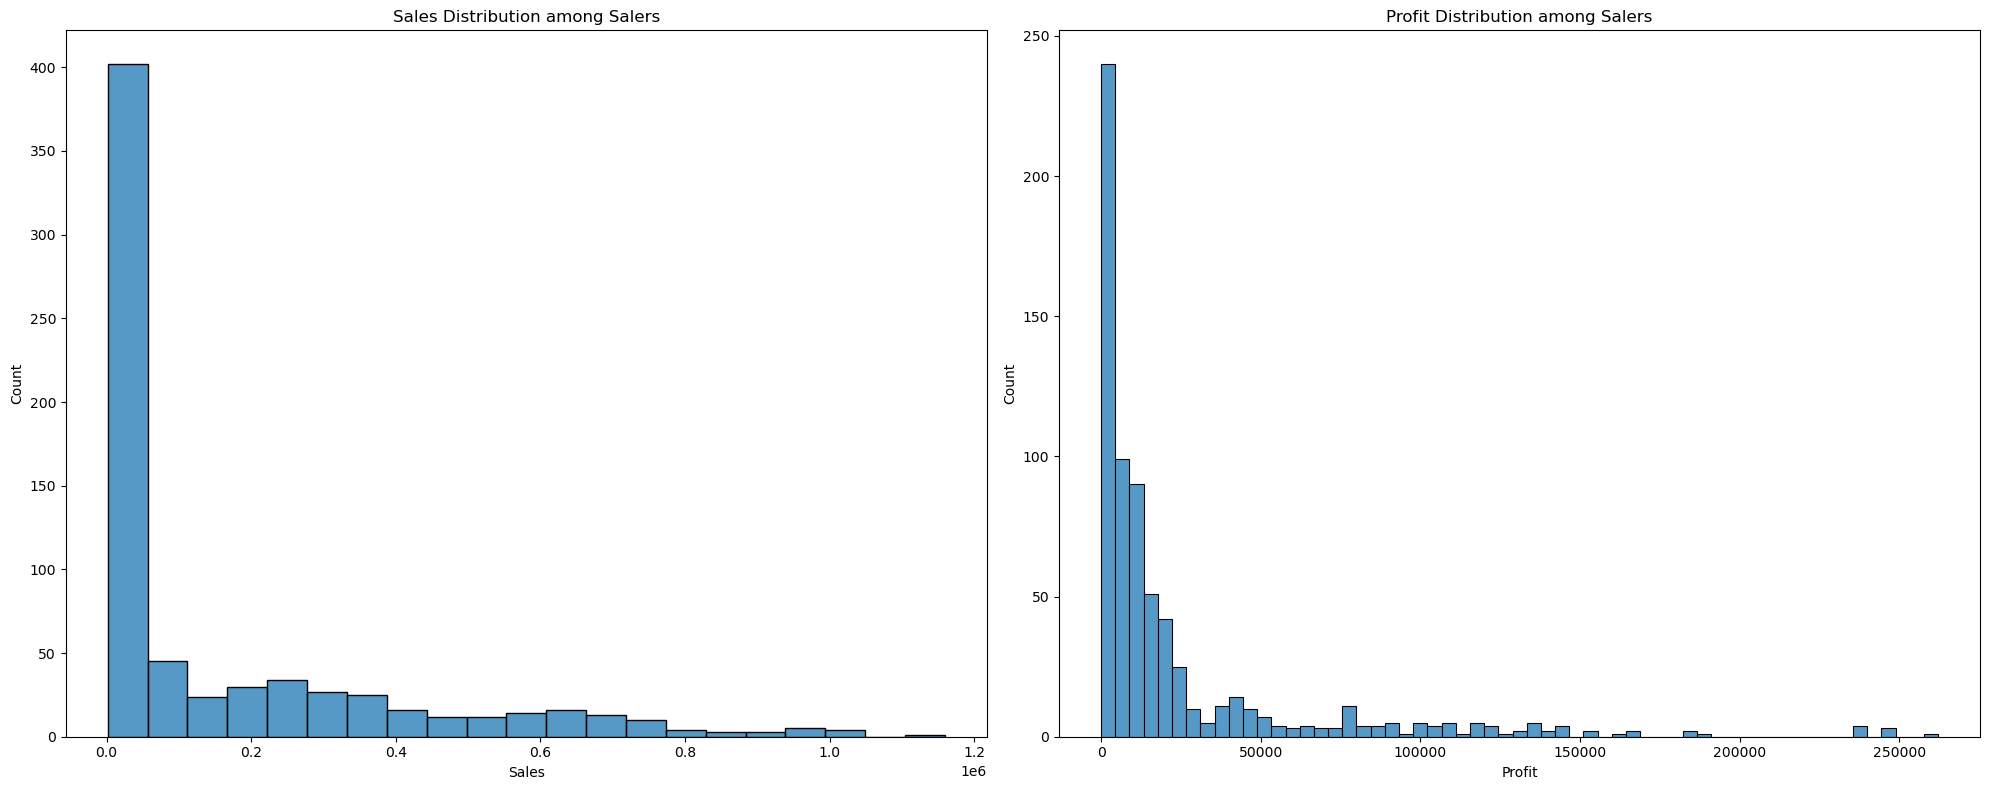

In [35]:
#  Creating a figure with two subplots in a single row
fig, axs = plt.subplots(1, 2, figsize=(20, 8))



# Histogram code
sns.histplot(data=financial_data, x="Sales", ax=axs[0])
#Title
axs[0].set_title("Sales Distribution among Salers")


# Histogram code
sns.histplot(data=financial_data, x="Profit", ax=axs[1])
#Title
axs[1].set_title("Profit Distribution among Salers")

# Fitting the graph properly
plt.tight_layout()

# Displaying the visualization
plt.show()

* Used to visualize the diststribution of sales amount made among firms and the number of corresponding firms.
Useful in tax assesment to ensure sustainable bussiness activities and significant government revenue

# Bar Plots

## Vertical

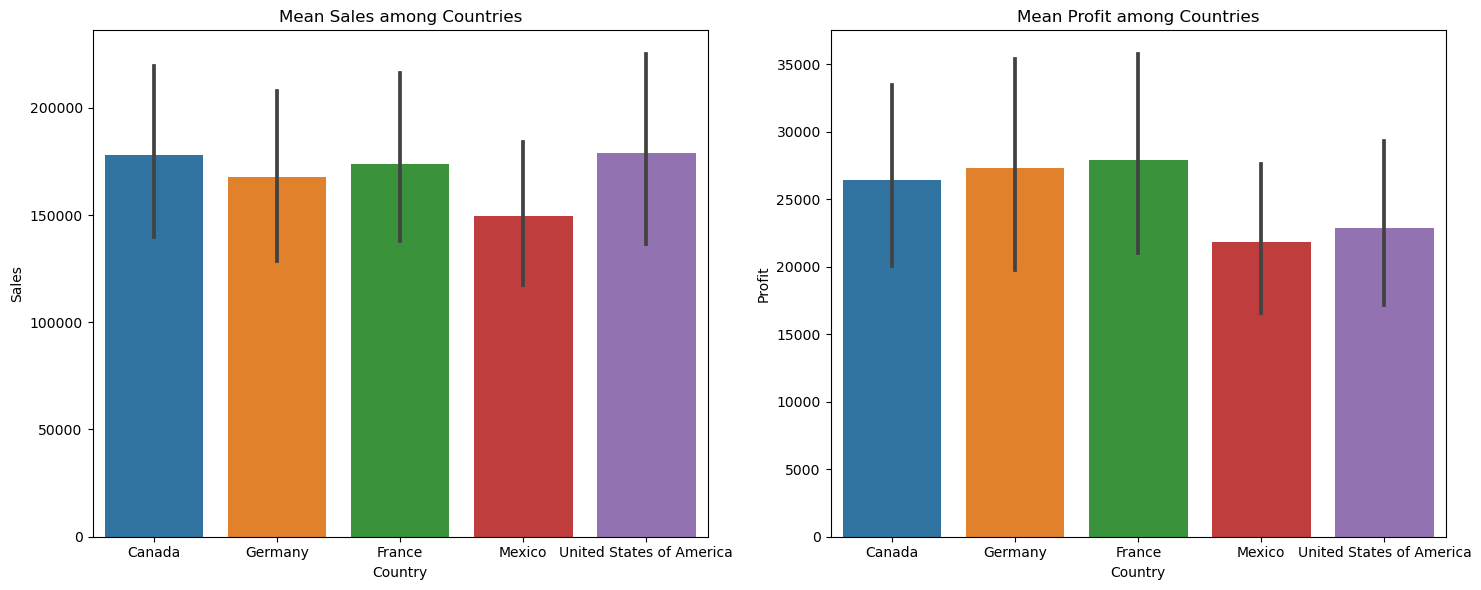

In [36]:
#  Creating a figure with two subplots in a single row
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Vertical Barplot code
sns.barplot(x="Country", y="Sales", data=financial_data , ax=axs[0])

# Plot Title
axs[0].set_title("Mean Sales among Countries")



# Vertical Barplot code
sns.barplot(x="Country", y="Profit", data=financial_data , ax=axs[1])

# Plot Title
axs[1].set_title("Mean Profit among Countries")



# Fitting the graph properly
plt.tight_layout()

# Displaying the visualization
plt.show()

* Visualizes the mean amount made in sales among countries. It helpful in accessing average incomes generated by governments hence foundation for bussiness strategy planning

## Horizontal

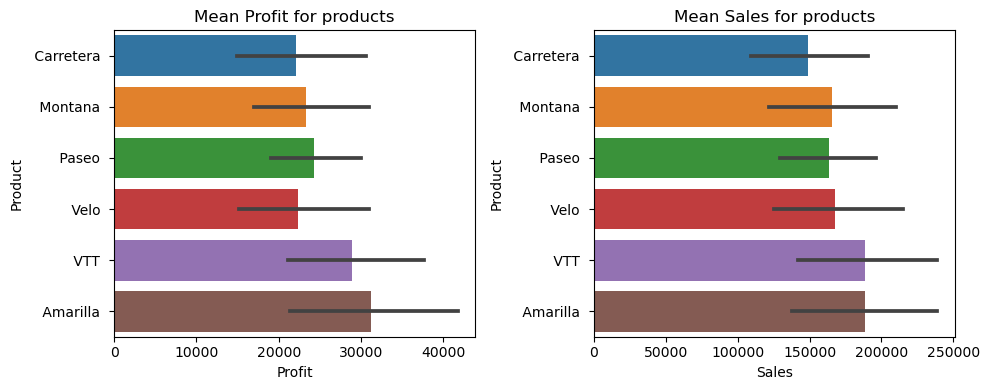

In [37]:
#  Creating a figure with two subplots in a single row
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Horizontal Barplot code
sns.barplot(y="Product", x="Profit", data=financial_data, orient="h", ax=axs[0])
# Plot Title
axs[0].set_title("Mean Profit for products")



# Horizontal Barplot code
sns.barplot(y="Product", x="Sales", data=financial_data, orient="h", ax=axs[1])
# Plot Title
axs[1].set_title("Mean Sales for products")


# Fitting the graph properly
plt.tight_layout()

# Displaying the visualization
plt.show()

* Visualizes the average sales for products involved in bussiness. 
Useful for determination of products that are performing well (demanded) hence 
investment adjustment.

# Pie Chart

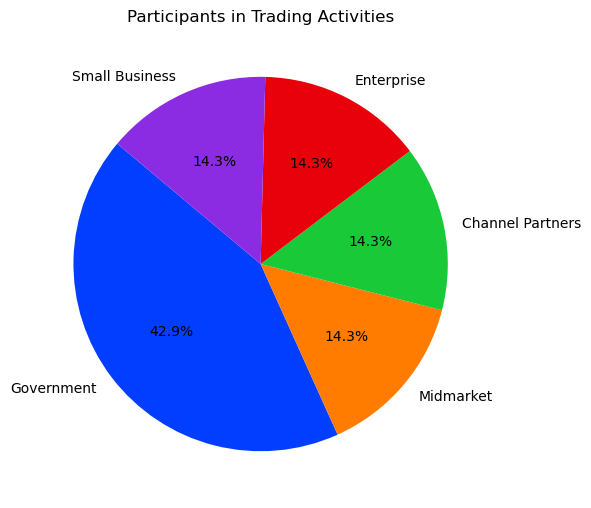

In [38]:
# Set the figure size
plt.figure(figsize=(6, 6))  

# Extracting data to be used for the pie chart from the data frame
x = financial_data['Segment'].value_counts()

# Seleting a set of bright colors to be used 
palette_color = sns.color_palette('bright')

# Pie chart code
plt.pie(x.values, labels=x.index, autopct='%1.1f%%',colors=palette_color, startangle=140)

# Plot Title
plt.title("Participants in Trading Activities")

# Fitting the graph properly
plt.tight_layout()

# Displaying the visualization
plt.show()

* Shows the distribution of types of participants in bussiness. Can act as foundation of better policies to favour equal opportunities in bussiness. e.g friendly taxes to all

# Heat Map

/tmp/ipykernel_6343/1736602845.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = financial_data.corr()


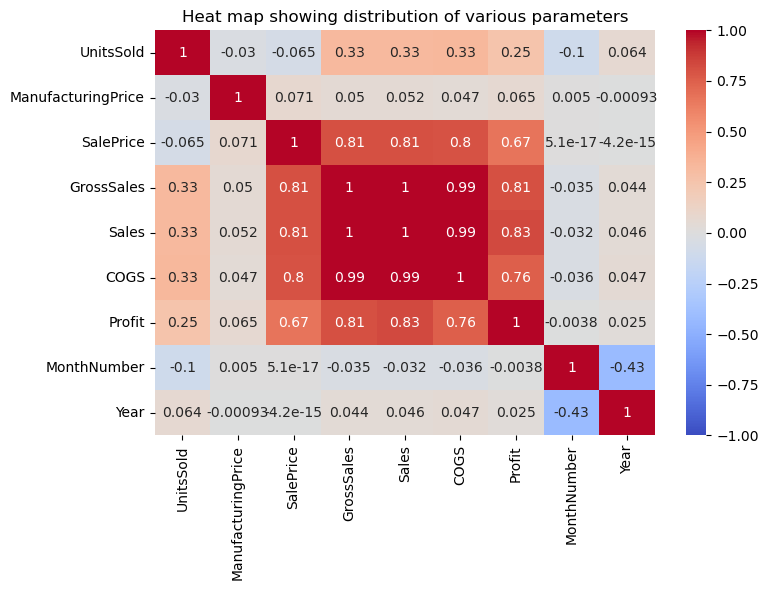

In [39]:

# Setting the figure size
plt.figure(figsize=(8, 6))  

correlation_matrix = financial_data.corr()

# Creating a heat map
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Plot Title
plt.title("Heat map showing distribution of various parameters")

# Fitting the graph properly
plt.tight_layout()

# Displaying the visualization
plt.show()


* Used to show the relationship between various aspects and how the affect each other. For the above we get insight on how various parameters are related. ( 1 for maximum dependency and low for minimum)

# Box Plot

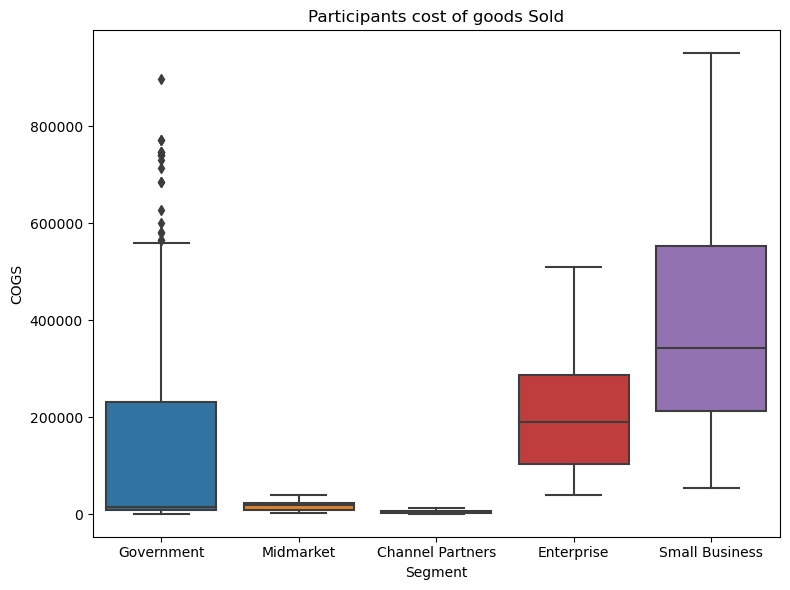

In [40]:

# Setting the figure size
plt.figure(figsize=(8, 6))

# Creating a box plot
sns.boxplot(x="Segment", y="COGS", data=financial_data)


# Plot Title
plt.title("Participants cost of goods Sold")

# Fitting the graph properly
plt.tight_layout()

# Displaying the visualization
plt.show()

* Enables to visualize the range of costs of goods sold among participants. Known the minimum costs to maximum costs. Can be useful in analyzing further limitations that bring about high cost of cost of goods

<Figure size 600x100 with 0 Axes>

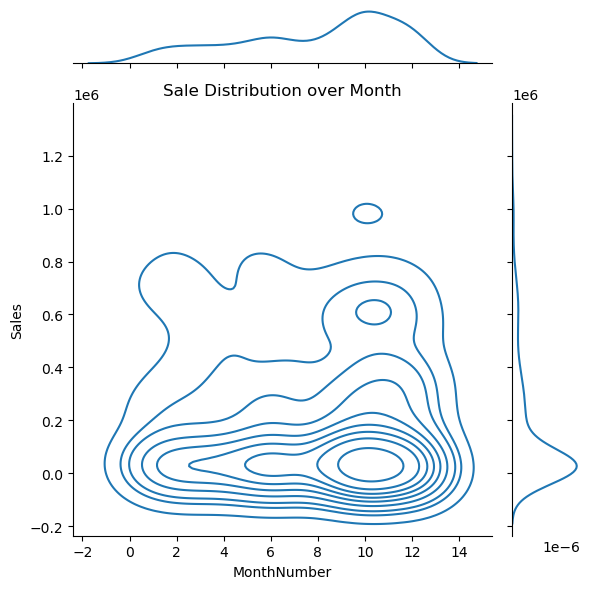

In [46]:
plt.figure(figsize=(6, 1))
sns.jointplot(x="MonthNumber", y="Sales", data=financial_data, kind="kde")


# Add title and remove y-axis
plt.title("Sale Distribution over Month")
plt.tight_layout()
plt.show()